In [1]:
%pylab inline
from parse_logs import build_df
import matplotlib.pyplot as plt
import numpy as np
import dateutil
import pandas as pd


def print_groupby(groupby):
    for name, group in groupby:
        print('name: ' + str(name))
        print('group: ' + str(group))
        print('\n')

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = build_df('./logs/final/200n-f0-50c-160puts.log')
df['timestamp'] = [dateutil.parser.parse(x) for x in df['timestamp']]

In [9]:
start_df = df[df.event_type == 'CLIENT_NEW_TRANSACTION']
group_start = start_df.groupby(['content_hash'], as_index=False).agg({'timestamp': np.min})

In [10]:
end_df = df[df.event_type == 'CLIENT_INTEGRATE_GLOBAL_RESULT']
group_end = end_df.groupby(['content_hash'], as_index=False).agg({'timestamp': np.max})

In [11]:
joined = pd.merge(group_end, group_start, on='content_hash')

In [12]:
diff = (joined['timestamp_x'] - joined['timestamp_y']).apply(lambda x: x.total_seconds()).rename('duration')
diff.head(3)

0    54.978
1    30.653
2     4.077
Name: duration, dtype: float64

Mean : 45.63980392156863
Median : 17.891000000000002


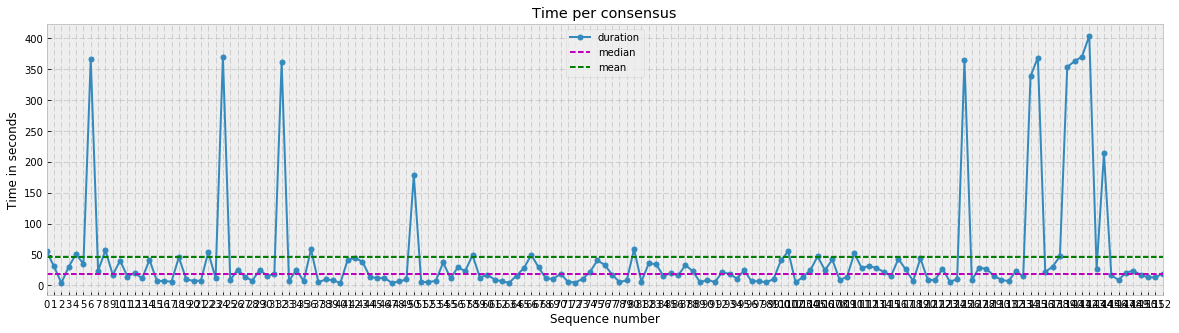

In [13]:
plt.style.use('bmh')
consensus_plot = diff.plot(lw=2, marker='.', markersize=10, title='Time per consensus', figsize=(20, 5))
mean = diff.mean()
median = diff.median()
print("Mean : {0}".format(mean))
print("Median : {0}".format(median))
consensus_plot.axhline(median, color='m', linestyle='dashed', label='median')
consensus_plot.axhline(mean, color='g', linestyle='dashed', label='mean')
consensus_plot.set_ylabel('Time in seconds')
consensus_plot.set_xlabel('Sequence number')
consensus_plot.set_xticks(range(diff.size))
l = consensus_plot.legend()
for t in l.get_texts():
    t.set_color('black')